In [4]:
# MacBook Pro
versioninfo()

Julia Version 1.2.0
Commit c6da87ff4b (2019-08-20 00:03 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)


In [51]:
] add RData XLSX DataFramesMeta

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [1313f7d8] + DataFramesMeta v0.5.0
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [1313f7d8] + DataFramesMeta v0.5.0


In [187]:
using RData
friends = load("friends.rdata")

Dict{String,Any} with 1 entry:
  "friends" => 1200×1 DataFrame…

In [53]:
typeof(friends)

Dict{String,Any}

In [54]:
first(friends)

Pair{String,Any}("friends", 1200×1 DataFrame
│ Row  │ Friends       │
│      │ Categorical…  │
├──────┼───────────────┤
│ 1    │ No difference │
│ 2    │ No difference │
│ 3    │ No difference │
│ 4    │ No difference │
│ 5    │ No difference │
│ 6    │ No difference │
│ 7    │ No difference │
│ 8    │ No difference │
│ 9    │ No difference │
│ 10   │ No difference │
⋮
│ 1190 │ Same sex      │
│ 1191 │ Same sex      │
│ 1192 │ Same sex      │
│ 1193 │ Same sex      │
│ 1194 │ Same sex      │
│ 1195 │ Same sex      │
│ 1196 │ Same sex      │
│ 1197 │ Same sex      │
│ 1198 │ Same sex      │
│ 1199 │ Same sex      │
│ 1200 │ Same sex      │)

In [166]:
using DataFrames, DataFramesMeta
df = DataFrame(friends["friends"])
first(df,5)

,Friends
,Categorical…
1,No difference
2,No difference
3,No difference
4,No difference
5,No difference


In [182]:
newdf = by(df, :Friends, nrow)

,Friends,x1
,Categorical…,Int64
1,No difference,602
2,Opposite sex,434
3,Same sex,164


In [183]:
names!(newdf, [:Friends, :Freq])

,Friends,Freq
,Categorical…,Int64
1,No difference,602
2,Opposite sex,434
3,Same sex,164


In [184]:
by(newdf, [:Friends, :Freq], 
    d -> (Prop = d.Freq/1200*100))

,Friends,Freq,x1
,Categorical…,Int64,Float64
1,No difference,602,50.1667
2,Opposite sex,434,36.1667
3,Same sex,164,13.6667


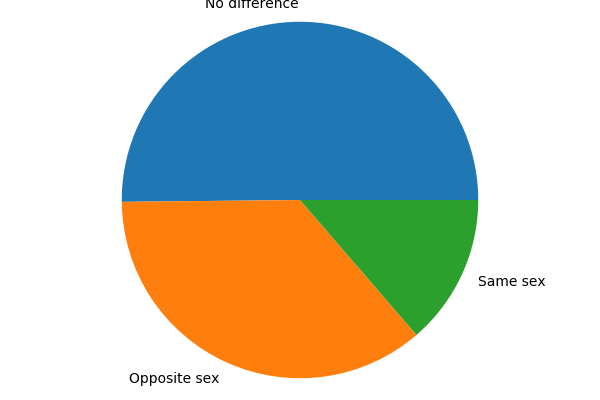

In [185]:
using StatsPlots
pyplot()
@df newdf pie(:Friends, :Freq)

In [189]:
using RCall
R"""
load("friends.rdata")
t = table(friends$Friends); t
"""

RObject{IntSxp}

No difference  Opposite sex      Same sex 
          602           434           164 


In [254]:
using ExcelFiles
friends = load("friends.xlsx", "Sheet1") |> DataFrame
tj = by(friends, :Friends, nrow)

,Friends,x1
,String,Int64
1,Opposite sex,434
2,No difference,602
3,Same sex,164


In [255]:
R"prop = prop.table(t);prop"

RObject{RealSxp}

No difference  Opposite sex      Same sex 
    0.5016667     0.3616667     0.1366667 


In [260]:
propj = by(tj, [:Friends, :x1], d -> d.x1/size(friends,1))

,Friends,x1,x1_1
,String,Int64,Float64
1,Opposite sex,434,0.361667
2,No difference,602,0.501667
3,Same sex,164,0.136667


In [263]:
R"percent=prop.table(t)*100;percent"

RObject{RealSxp}

No difference  Opposite sex      Same sex 
     50.16667      36.16667      13.66667 


In [264]:
percentj = by(tj, [:Friends, :x1], d -> d.x1/size(friends,1)*100)

,Friends,x1,x1_1
,String,Int64,Float64
1,Opposite sex,434,36.1667
2,No difference,602,50.1667
3,Same sex,164,13.6667


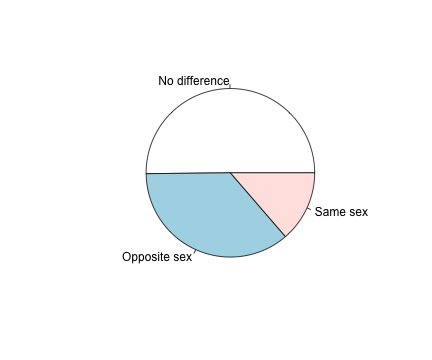

RObject{NilSxp}
NULL


In [266]:
R"""
lbl = paste(c("No difference","Opposite sex","Same sex"),pf,"%",sep=" ");
pie(t)
"""

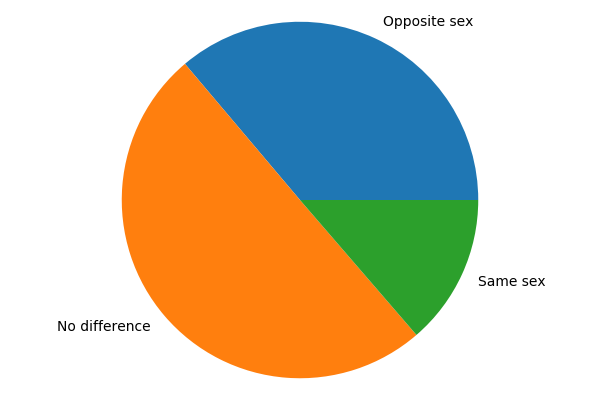

In [267]:
using StatsPlots
@df percentj pie(:Friends, :x1_1)